Load module

In [1]:
import pandas as pd, numpy as np, random
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Data acquistion / Data exploration

In [3]:
folder_LR = 'drive/My Drive/ML-progress/tugas-PMKA-1/Housing.csv'

In [4]:
df_lr = pd.read_csv(folder_LR)
df_lr.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# data sudah bersih
def cek(val):
  if val > 10000000:
    return val

def cekX(val):
  if type(val) == :
    return val
n = df_lr['price'].apply(lambda x: cek(x))
z = map(cekX, n.values)
for x in z:
  print(x)

13300000.0
12250000.0
12250000.0
12215000.0
11410000.0
10850000.0
10150000.0
10150000.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


<ipython-input-110-abb398e64a25>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_lr.corr(), annot=True, cmap='coolwarm')


<Axes: >

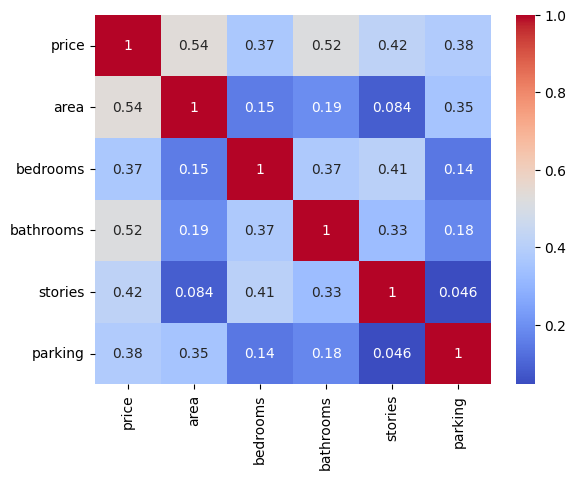

In [ ]:
# cek korelasi antar fitur
sns.heatmap(df_lr.corr(), annot=True, cmap='coolwarm')

In [ ]:
combine_key = [['price', 'area'], ['price', 'bathrooms']]

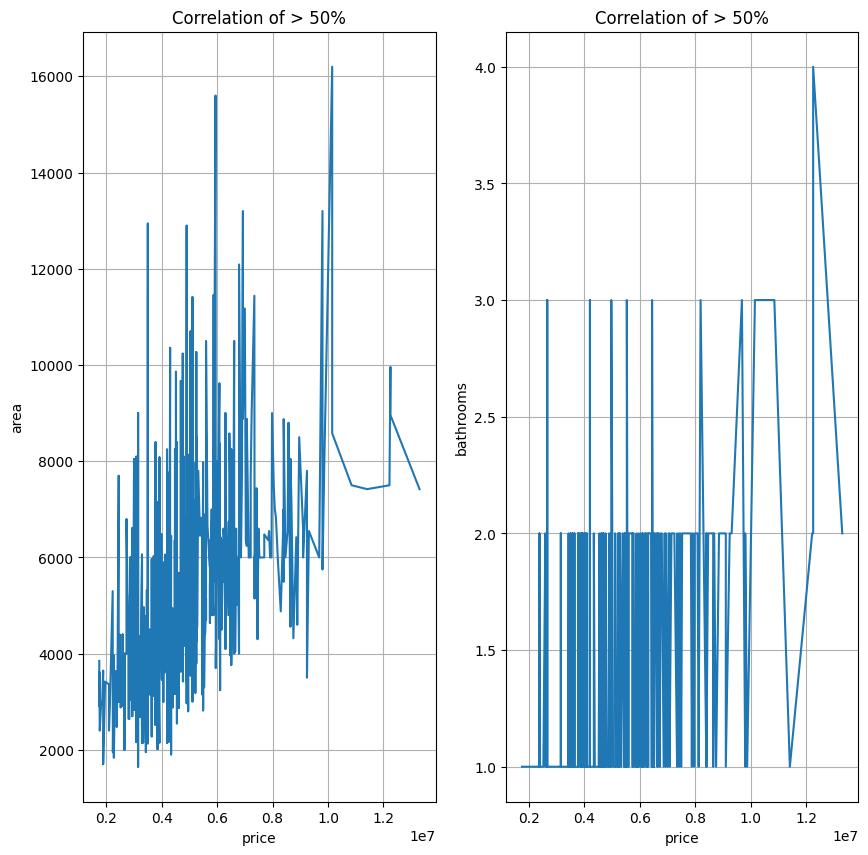

In [ ]:
# misalnya diambil sampel jika korelasi > 50% maka setiap area dan jumlah kamar mandi mempengaruhi harga
plt.figure(figsize=(10, 10))
for i in range(2):
  ax = plt.subplot(1, 2, i+1)
  plt.plot(df_lr[combine_key[i][0]], df_lr[combine_key[i][1]])
  plt.xlabel(combine_key[i][0])
  plt.ylabel(combine_key[i][1])
  plt.title('Correlation of > 50%')
  plt.grid(True)
plt.show()

Linear Regression

In [ ]:
# memilih independent dan dependent
independent = df_lr[['area', 'bedrooms', 'bathrooms', 'parking']]
dependent = df_lr[['price']]

In [ ]:
dependent.values[0:10]

array([[13300000],
       [12250000],
       [12250000],
       [12215000],
       [11410000],
       [10850000],
       [10150000],
       [10150000],
       [ 9870000],
       [ 9800000]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.2, random_state=42)

In [ ]:
X_test.values[0:10]

array([[5900,    4,    2,    1],
       [6500,    3,    2,    0],
       [4040,    2,    1,    0],
       [5000,    3,    1,    0],
       [3960,    3,    1,    0],
       [6720,    3,    1,    0],
       [8520,    3,    1,    2],
       [4990,    4,    2,    0],
       [3240,    2,    1,    1],
       [2700,    3,    1,    0]])

In [ ]:
class myMultiLinearRegression:
  def __init__(self):
    self.b0 = 0
    self.bn = []

  # menghitung b0 dan b1
  def coefficients(self, x, y):
    # mean
    mean_of_y = np.mean(y.flatten())
    mean_of_x = np.mean(x, axis=0)

    # calc sum x and y
    sum_of_y = np.sum(y.flatten())
    sum_of_x = np.sum(x, axis=0)

    # kuadrat x
    x_quad = [[element**2 for element in row] for row in x]
    sum_quad_x = np.sum(x_quad, axis=0)

    # x * y
    x_multiply_y = [[element * sum_of_y for element in row] for row in x]
    sum_x_multiply_y = np.sum(x_multiply_y, axis=0)

    # rumus bi turunan -> bi = sigma (xi - x)(yi - y)/(x1-x)^2
    # [b1, b2, b3, b4]
    self.bn = np.sum((x - mean_of_x) * (y - mean_of_y), axis=0) / np.sum((x - mean_of_x)**2, axis=0)

    # rumus b0 turunan -> b0 = y_mean - b1 * x_mean1 - ...
    for i in range(len(self.bn)):
      if i < 1:
        self.b0 = mean_of_y - ((self.bn[i] * mean_of_x[i]))
      else:
        self.b0 -= ((self.bn[i] * mean_of_x[i]))

  # Multi linear regression
  def predict(self, x_tester):
    point = 0
    pred = []
    print('b0', self.b0, 'b1', self.bn)
    # Y = b0 + b1X1 + b2X2 + ⋯ + bnXn + e
    for row in x_tester:
      for i in range(len(row)):
        point += self.b0 + (self.bn[i] * row[i]) if i < 1 else self.bn[i] * row[i]
        if i == len(row) -1:
          pred.append(point)
          point = 0

    return np.array(pred).reshape(-1, 1)

In [ ]:
model_lr = myMultiLinearRegression()
model_lr_fit = model_lr.coefficients(X_train.values, y_train.values)
model_lr_fit
# x_test must be 2 dimension, 4 columns
# predict price by regression
model_lr_pred = model_lr.predict(X_test.values)
model_lr_pred[0:10]

b0 -3087813.028244553 b1 [4.25729842e+02 8.73140740e+05 1.96095361e+06 7.78700308e+05]


array([[7617163.52691408],
       [6220760.38357662],
       [2339370.6229655 ],
       [3621212.01156239],
       [3178452.97594606],
       [4353467.3396971 ],
       [6677181.67151706],
       [6451049.06258471],
       [2777487.05757955],
       [2642033.37510319]])

In [ ]:
# make sure the value regression
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(X_train, y_train)
# predictions = model.predict(X_test)
# predictions

In [ ]:
print(f'len:{len(model_lr_pred)}')

len:109


Linear Classify

In [ ]:
df_lc = pd.read_csv(folder_LR)
df_lc.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
grouping = df_lc.groupby('mainroad')
grouping.size()

mainroad
no      77
yes    468
dtype: int64

Text(0, 0.5, 'Total')

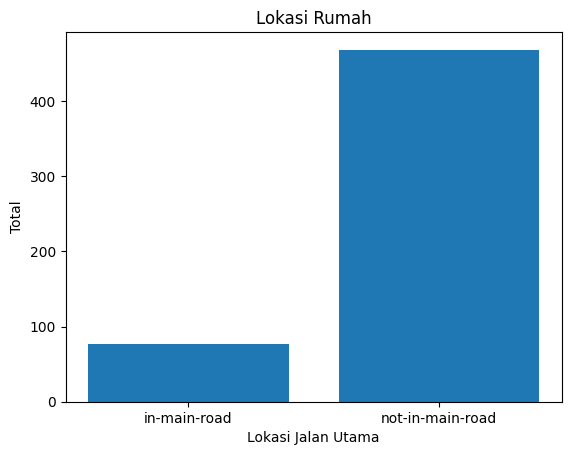

In [ ]:
plt.bar(['in-main-road', 'not-in-main-road'], grouping.size().values)
plt.title('Lokasi Rumah')
plt.xlabel('Lokasi Jalan Utama')
plt.ylabel('Total')

In [ ]:
!pip install imbalanced-learn

In [ ]:
df_lc = df_lc[['price', 'area', 'bedrooms', 'bathrooms', 'parking','mainroad']]
df_lc.head()

,price,area,bedrooms,bathrooms,parking,mainroad
0,13300000,7420,4,2,2,yes
1,12250000,8960,4,4,3,yes
2,12250000,9960,3,2,2,yes
3,12215000,7500,4,2,3,yes
4,11410000,7420,4,1,2,yes


In [ ]:
target_conv = {'yes': 1, 'no': -1}
df_lc['target'] = df_lc['mainroad'].apply(lambda name: target_conv[name])
df_lc.head()

<ipython-input-126-fb4359ce9399>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lc['target'] = df_lc['mainroad'].apply(lambda name: target_conv[name])


,price,area,bedrooms,bathrooms,parking,mainroad,target
0,13300000,7420,4,2,2,yes,1
1,12250000,8960,4,4,3,yes,1
2,12250000,9960,3,2,2,yes,1
3,12215000,7500,4,2,3,yes,1
4,11410000,7420,4,1,2,yes,1


In [ ]:
x = df_lc[['price', 'area', 'bedrooms', 'bathrooms', 'parking']].values
y = df_lc['target'].values

Text(0, 0.5, 'Total')

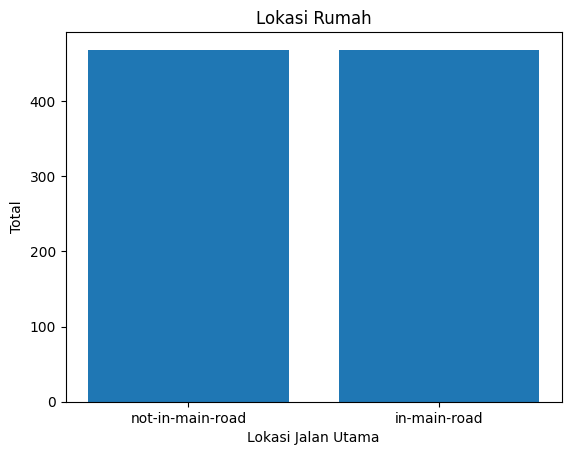

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
x, y = smote.fit_resample(x, y)
unique_values, counts = np.unique(y, return_counts=True)
plt.bar(['not-in-main-road','in-main-road'], counts)
plt.title('Lokasi Rumah')
plt.xlabel('Lokasi Jalan Utama')
plt.ylabel('Total')

In [ ]:
# Min-Max scaling
# preprocessing scale data
def min_max_scaling(data):
    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0)
    scaled_data = (data - min_vals) / (max_vals - min_vals)
    return scaled_data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(748, 188, 748, 188)

In [ ]:
X_train

array([[10850000,     7500,        3,        3,        2],
       [ 7350000,     6000,        3,        2,        1],
       [ 4319000,     4032,        2,        1,        0],
       ...,
       [ 2940000,     2993,        2,        1,        0],
       [ 3290000,     4040,        2,        1,        0],
       [ 6195000,     5500,        3,        2,        1]])

In [ ]:
class LinearClassification:
  def __init__(self, epoch=1):
    self.fit_result = None
    self.epoch = epoch
    self.training_phase = None

  def readLabel(self, yn):
    if yn >= 0:
      yn = 1
    else:
      yn = -1

    return yn

  def myPerceptron(self, x, y, index):
    # select value of weight likely random
    randomValue = [i for i in range(11)]
    # randomValue = random.choice(randomValue) #inisial weight -> miss value
    randomWeight = [0.5 for i in range(6)]

    # update bobot for each row data -> SGD
    predict = []
    is_update = 0
    myLambda = 0.5

    index = 0
    for row in range(len(x)):
      yn = 0

      for column in range(len(x[row])):
        # y = sigma w0 + w1x1 + w2x2 + ... + wnxn
        yn = yn + randomWeight[0] if column == 0 else yn + randomWeight[column] * x[row][column - 1]

      #range value for perceptron
      # If the output is negative, assign the label -1.
      # If the output is positive, assign the label 1.
      # introduce a condition for outputs close to 0 to be mapped to 0

      yn = self.readLabel(yn)

      predict.append(yn)

      #  update weight
      if yn != y[row]:
        is_update += 1
        for i in range(len(randomWeight)):
          # w0 = w0 + lambda * (y - yn)
          # wn = wn + lambda * (y - yn) * xn
          randomWeight[i] = randomWeight[0] + (myLambda * (y[row] - yn)) if i < 1 else randomWeight[i] + (myLambda * (y[row] - yn) * x[row][i - 1])

      index += 1
      yn = 0

    return {
        'persentase (%)': 100 - (is_update / len(x)),
        'lambda': myLambda,
        'Weight': randomWeight,
        'fit_train': predict
    }

  def fit(self, x, y):
    myArray = []
    for i in range(self.epoch):
      perceptron = self.myPerceptron(x, y, i)
      print(f'Training score - {i}: {perceptron["persentase (%)"]}')
      myArray.append(perceptron)

    # return final weight
    self.training_phase = myArray
    self.final_result = myArray[-1]['Weight']

  # especially 4 features
  def predict(self, x):
    myArray = []

    for row in range(len(x)):
      yn = 0

      for column in range(len(x[row])):
        # y = sigma w0 + w1x1 + w2x2 + ... + wnxn
        yn = yn + self.final_result[0] if column == 0 else yn + (self.final_result[column] * x[row][column - 1])

      yn = self.readLabel(yn)

      myArray.append(yn)
      yn = 0

    print('--- predict ---\n')
    return np.array(myArray)


In [ ]:
# scale the input
def inputAfterScale(input):
  return min_max_scaling(input)

In [ ]:
input_train = inputAfterScale(X_train)
input_test = inputAfterScale(X_test)

In [ ]:
model_lc = LinearClassification(50)
model_lc.fit(input_train, y_train)
predict = model_lc.predict(input_test)
predict

Training score - 0: 99.62967914438502
Training score - 1: 99.62967914438502
Training score - 2: 99.62967914438502
Training score - 3: 99.62967914438502
Training score - 4: 99.62967914438502
Training score - 5: 99.62967914438502
Training score - 6: 99.62967914438502
Training score - 7: 99.62967914438502
Training score - 8: 99.62967914438502
Training score - 9: 99.62967914438502
Training score - 10: 99.62967914438502
Training score - 11: 99.62967914438502
Training score - 12: 99.62967914438502
Training score - 13: 99.62967914438502
Training score - 14: 99.62967914438502
Training score - 15: 99.62967914438502
Training score - 16: 99.62967914438502
Training score - 17: 99.62967914438502
Training score - 18: 99.62967914438502
Training score - 19: 99.62967914438502
Training score - 20: 99.62967914438502
Training score - 21: 99.62967914438502
Training score - 22: 99.62967914438502
Training score - 23: 99.62967914438502
Training score - 24: 99.62967914438502
Training score - 25: 99.62967914438

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1])

In [ ]:
# {'mainroad': 1, 'non-mainroad': -1}
data_list = [8745000,    9100,       3,       3,       2]
my_predict_random = np.array(data_list).reshape(1, 5)
myPredict_random = inputAfterScale(my_predict_random)
model_lc.predict(myPredict_random)

--- predict ---



<ipython-input-129-718e08676835>:6: RuntimeWarning: invalid value encountered in divide
  scaled_data = (data - min_vals) / (max_vals - min_vals)


array([-1])

In [ ]:
def confusion_matrix(true_labels, predicted_labels, num_classes):
    # Initialize confusion matrix with zeros
    matrix = np.zeros((num_classes, num_classes), dtype=int)

    # Fill in the confusion matrix
    for true, pred in zip(true_labels, predicted_labels):
        matrix[true][pred] += 1

    return matrix

def accuracy(confusion_matrix):
    correct_predictions = np.trace(confusion_matrix)  # Sum of diagonal elements
    total_predictions = np.sum(confusion_matrix)  # Sum of all elements
    acc = correct_predictions / total_predictions
    return f'{acc*100}%'

In [ ]:
arr_confusion_matrix = confusion_matrix(y_test, predict, 3)
# arr_confusion_matrix
accuracy(arr_confusion_matrix)

'51.06382978723404%'